### Kehua Chu (UID: 806153163)

### Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from simple_colors import *
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LassoCV, RidgeCV

### Problem 1 - Let 𝑓(𝑥) = 𝑥^4 − 6𝑥^2 + 4𝑥 + 18. 

### (iii) Plot the function 𝑓 over 𝑥 ∈ [−2.5, 2.5]. How many local/global minima do you see? What are their approximate values? Can there be other local minima?

In [2]:
def f(x):
    y = x**4 - 6*x**2 + 4*x + 18
    return y

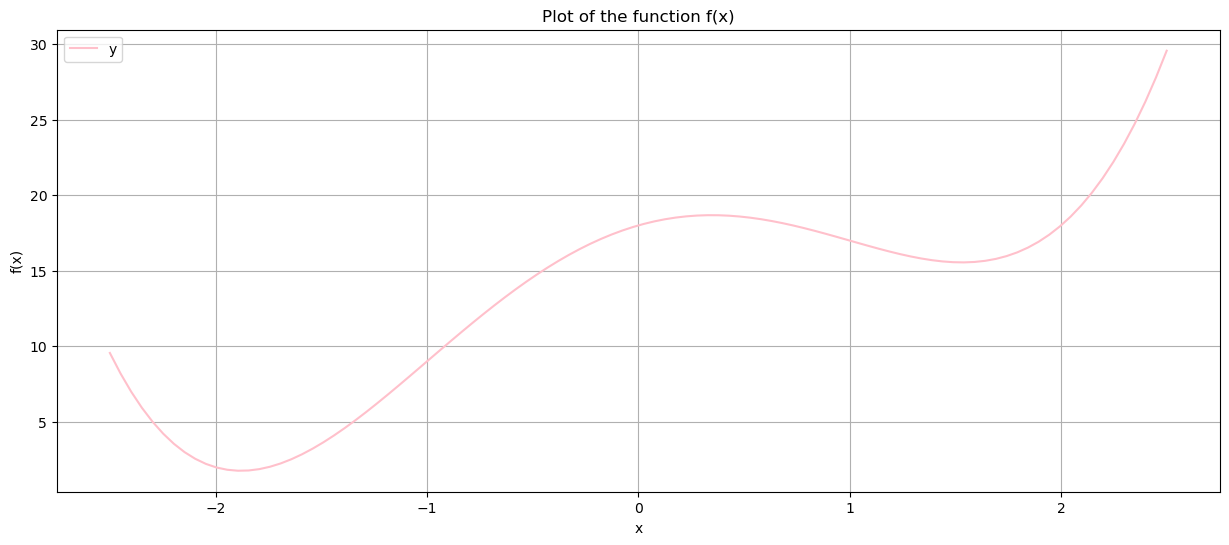

In [3]:
X = np.linspace(-2.5, 2.5, 100)
y = f(X)

plt.figure(figsize=(15, 6))
plt.plot(X, y, label='y', color='pink')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the function f(x)')
plt.grid(True)
plt.legend()
plt.show()

I can see 2 local minima, their approximate values are -1.8 and 1.5. There may not be any other local minima, since y below range of x<-2.5 or y beyond range of x>2.5 all goes up monotonically.

### (iv) Write your own code for 𝑆 steps of GD on this function (do not use built-in or third-party GD codes)

In [4]:
def df_dx(x):
    return 4*x**3 - 12*x + 4

In [5]:
def GD(initial_x, step,alpha):
    x = initial_x 
    x_value = [x]
    for s in range(step):
        grad = df_dx(x)  
        x = x - alpha * grad  
        x_value.append(x)
    return x_value

In [9]:
initial_x = 1
step = 10
alpha = 0.1

GD(initial_x, step, alpha)

[1,
 1.4,
 1.5823999999999998,
 1.4963546415104,
 1.5517987790722083,
 1.5192154133381854,
 1.5397248375543011,
 1.5272719930151006,
 1.5350171190625246,
 1.5302671077620147,
 1.5332063790044113]

In [7]:
initial_x = 0
step = 10
alpha = 0.1

GD(initial_x, step, alpha)

[0,
 -0.4,
 -1.2544,
 -2.3701509259264,
 -0.28849348925106977,
 -1.0250813249728175,
 -2.2243201263455896,
 -0.8914857533491816,
 -2.077866460212338,
 -1.3828067104246002,
 -2.384518789546544]

### (v) Repeat (i) and (ii) using your code with 𝑆 = 20 steps. Do you observe convergence in both cases?

In [10]:
initial_x = 1
step = 20
alpha = 0.1

GD(initial_x, step, alpha)

[1,
 1.4,
 1.5823999999999998,
 1.4963546415104,
 1.5517987790722083,
 1.5192154133381854,
 1.5397248375543011,
 1.5272719930151006,
 1.5350171190625246,
 1.5302671077620147,
 1.5332063790044113,
 1.5313973698196879,
 1.5325145038473287,
 1.5318260511057153,
 1.5322508642835628,
 1.5319889371285826,
 1.5321505120475563,
 1.5320508711908891,
 1.532112329575238,
 1.5320744264173558,
 1.5320978040292623]

In [11]:
initial_x = 0
step = 20
alpha = 0.1

GD(initial_x, step, alpha)

[0,
 -0.4,
 -1.2544,
 -2.3701509259264,
 -0.28849348925106977,
 -1.0250813249728175,
 -2.2243201263455896,
 -0.8914857533491816,
 -2.077866460212338,
 -1.3828067104246002,
 -2.384518789546544,
 -0.22265870431016221,
 -0.8854336582795075,
 -2.070284616055942,
 -1.405265292488476,
 -2.3815530420008457,
 -0.2363445410729268,
 -0.9146772268543001,
 -2.1061897151968125,
 -1.2963647580668578,
 -2.380554142228462]

Nope.

Starting the initial value as 1 results in convergence (around 1.532), while starting from 0 does not converge within 20 steps due to significant fluctuations between -1 and -2. This observation underscores the importance of selecting an appropriate starting point for convergence.

### (vi) Now set the learning rate to 𝛼 = 0.01 and repeat (v). Explain why GD performs differently from (v)

In [14]:
initial_x = 1
step = 20
alpha = 0.01

GD(initial_x, step, alpha)

[1,
 1.04,
 1.0798054400000001,
 1.119020840068549,
 1.1572534830439267,
 1.1941304973887767,
 1.229315454262303,
 1.262522837530415,
 1.2935289442241535,
 1.3221782260494936,
 1.3483847002782723,
 1.372128707840095,
 1.3934498428239785,
 1.4124372242060033,
 1.4292183920198969,
 1.4439480114680723,
 1.4567973253950453,
 1.4679449872507762,
 1.4775696023631308,
 1.4858440513255176,
 1.4929314867366945]

In [13]:
initial_x = 0
step = 20
alpha = 0.01

GD(initial_x, step, alpha)

[0,
 -0.04,
 -0.08479744,
 -0.1349487430013408,
 -0.1910442892180012,
 -0.2536906951534041,
 -0.3234804877103682,
 -0.40094419114643426,
 -0.4864793227884729,
 -0.5802515921846035,
 -0.6820671425672264,
 -0.791222869032004,
 -0.9063563283704102,
 -1.025336878870371,
 -1.1452591933707572,
 -1.2626045652651865,
 -1.3736048457479124,
 -1.4747692568020896,
 -1.5634399244753172,
 -1.6381892906071331,
 -1.6989180105534625]


Different learning rates can affect the convergence speed and final optimization results of the gradient descent algorithm. With the same number of steps, a lower learning rate leads to slower convergence, potentially taking longer to reach local or global minima compared to higher learning rates. Conversely, higher learning rates may cause oscillations and overshooting past the minimum.

### Problem 2
### The College.csv dataset contains admissions data for a sample of 777 universities. We want to predict the number of applications received (‘Apps’) using the other variables in the dataset.

In [18]:
data = pd.read_csv('College.csv')
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [19]:
data = pd.get_dummies(data, drop_first = True)
data.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,True
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,True
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,True
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,True
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,True


In [17]:
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


### (i) Let the first 600 observations be the training set and the remaining 177 observations be the test set.

In [28]:
train_data = data.iloc[:600]
test_data = data.iloc[600:]

In [29]:
train_data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,2605.828333,1745.463333,653.636667,26.836667,54.988333,3017.056667,672.950000,10538.520000,4390.981667,545.348333,1273.935000,71.425000,78.543333,14.034667,23.385000,9465.220000,65.991667
std,3652.146478,2267.308223,812.883865,16.976365,19.616138,4185.820413,1095.065335,3991.970641,1100.808653,169.684034,644.107215,16.280545,14.992868,3.857789,12.211278,4835.076926,17.181684
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.900000,0.000000,3186.000000,10.000000
25%,684.500000,547.000000,223.750000,15.000000,40.000000,929.750000,81.750000,7550.000000,3602.250000,450.000000,836.250000,61.000000,68.000000,11.500000,14.000000,6789.750000,54.000000
50%,1315.000000,998.500000,380.000000,23.000000,54.000000,1503.500000,304.000000,10100.000000,4245.000000,500.000000,1125.000000,73.000000,80.500000,13.500000,22.000000,8305.500000,66.500000
75%,2974.500000,2038.250000,714.500000,35.000000,68.000000,2994.000000,776.000000,12952.500000,5053.000000,600.000000,1598.500000,84.000000,91.000000,16.425000,32.000000,10521.750000,78.000000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,10221.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,63.000000,56233.000000,118.000000


In [30]:
test_data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,4343.367232,2945.384181,1208.231638,30.005650,58.536723,6014.655367,1473.429379,10108.971751,4244.118644,563.050847,1566.768362,76.847458,83.632768,14.276271,20.570621,10321.022599,63.672316
std,4278.034044,2806.357328,1148.435837,19.580109,20.248178,6092.722822,2374.976621,4120.704737,1077.994109,148.169638,736.655285,15.829504,13.057811,4.288039,12.782571,6331.550033,17.091165
min,152.000000,128.000000,46.000000,2.000000,20.000000,199.000000,3.000000,2700.000000,1920.000000,110.000000,300.000000,10.000000,33.000000,2.500000,0.000000,3733.000000,29.000000
25%,1373.000000,978.000000,377.000000,17.000000,45.000000,1411.000000,156.000000,6857.000000,3505.000000,500.000000,1100.000000,69.000000,77.000000,11.500000,11.000000,6735.000000,52.000000
50%,2702.000000,1855.000000,696.000000,25.000000,57.000000,3234.000000,665.000000,9140.000000,4108.000000,530.000000,1435.000000,81.000000,87.000000,14.100000,17.000000,8731.000000,63.000000
75%,6277.000000,4007.000000,1697.000000,41.000000,72.000000,9260.000000,1660.000000,12660.000000,5045.000000,605.000000,2000.000000,88.000000,94.000000,16.500000,26.000000,11217.000000,75.000000
max,19873.000000,12940.000000,5705.000000,95.000000,100.000000,30017.000000,21836.000000,19840.000000,7270.000000,1400.000000,4288.000000,99.000000,100.000000,25.300000,64.000000,45702.000000,100.000000


In [46]:
X_train = train_data[['Accept','Enroll','Top10perc','Top25perc','F.Undergrad','P.Undergrad','Outstate','Room.Board','Books','Personal','PhD','Terminal','S.F.Ratio','perc.alumni','Expend','Grad.Rate', 'Private_Yes']]
y_train = train_data['Apps']

In [47]:
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

LinearRegression()

In [48]:
X_test = test_data[['Accept','Enroll','Top10perc','Top25perc','F.Undergrad','P.Undergrad','Outstate','Room.Board','Books','Personal','PhD','Terminal','S.F.Ratio','perc.alumni','Expend','Grad.Rate', 'Private_Yes']]
y_test = test_data['Apps']
y_pred = ols_model.predict(X_test)

In [69]:
test_error = mean_squared_error(y_test, y_pred)
print("TEST MSE:", round(test_error,4))

TEST MSE: 1502077.4348


### For the rest of the problem, let the penalization parameter vary on the 1000-point grid from 0.01 to 60.

In [43]:
penal = np.linspace(0.01, 60, 1000)

### (iii) Fit the LASSO regression on the training set, with the penalization parameter chosen by 20-fold cross-validation. Report the test error obtained.

In [50]:
lasso = LassoCV(cv = 20, alphas = penal)

In [70]:
lasso.fit(X_train, y_train)

y_pred_test = lasso.predict(X_test)
test_error = mean_squared_error(y_test, y_pred_test)
print("TEST MSE:", round(test_error,4))

TEST MSE: 1502356.4878


### (iv) Fit the ridge regression on the training set, with the penalization parameter chosen by leaveone-out cross-validation. Report the test error obtained.

In [67]:
ridge = RidgeCV(penal, store_cv_values = True)

In [71]:
ridge.fit(X_train, y_train)

y_pred_test = ridge.predict(X_test)
test_error = mean_squared_error(y_test, y_pred_test)
print("TEST MSE:", round(test_error,4))

TEST MSE: 1504969.1725


### (v) Which of the three models do you prefer? Is there much difference among the test errors?

I prefer the OLS model, since it has a relatively lower MSE, is much easier to perform and is much easier to interpret with results/coefficients. There is not much difference among the test errors, they are all around 150,000.